# <center> PDO convolution</center>

In this notebook we analyse the way a convolutional operator correspond to Partial Differential Operators

In [1]:
import sys
sys.path.append("../WF_inpaint/")

## Load data

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import numpy.random as rnd
from ellipse.ellipseWF_factory import random_ellipse, _ellipses_parameters, _ellipse_grad_gen, _ellipse_gen, plot_WF

In [10]:
size = 256
dirBias = 60

In [11]:
center = [size/2,size/2]
width = 50
height = 70
angle = 15
opacity = 1
grad_level = rnd.uniform(-2,2)
if grad_level <= 0:
    f = 1-_ellipse_gen(center, width, height, angle, size, opacity)
else:
    f = 1-_ellipse_grad_gen(center, width, height, angle, size, opacity, grad_level)

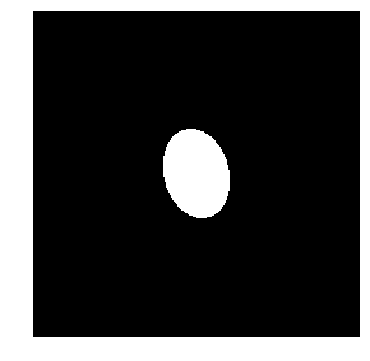

In [12]:
plt.figure(figsize = (6,6))
plt.axis("off")
plt.imshow(f, cmap="gray")

## Zeroth order matrix

In [139]:
## Let us compute the convolution
from scipy.signal import convolve2d

The zeroth derivative is given my the matrix:

$$
\Delta_{11}= \begin{bmatrix} 0 & 0 & 0 \\ 0 & 1 & 0 \\ 0 & 0 & 0 \end{bmatrix}
$$

In [173]:
# Let us define the kernels remember in numpy arrays the order of dimension is opossite
D_11 = np.array([[0,0,0],[0, 1, 0], [0 , 0 , 0]])

In [174]:
f_11 = convolve2d(f, D_11)

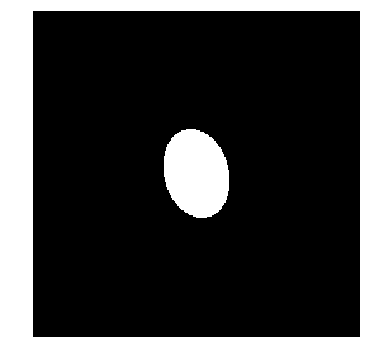

In [175]:
plt.figure(figsize = (6,6))
plt.axis("off")
plt.imshow(f_11, cmap="gray")

## First order matrices

### First order derivative with numpy gradient

In [268]:
f_grad = np.gradient(f)

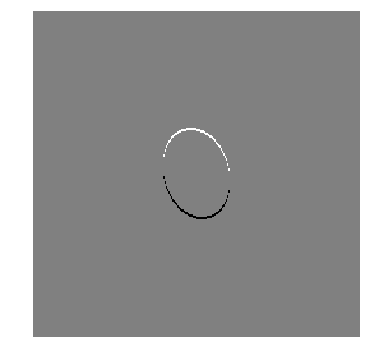

In [269]:
# D_y
plt.figure(figsize = (6,6))
plt.axis("off")
plt.imshow(f_grad[0], cmap="gray")

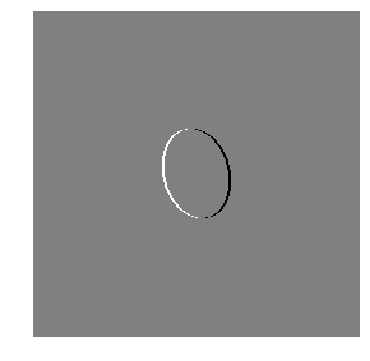

In [270]:
# D_x
plt.figure(figsize = (6,6))
plt.axis("off")
plt.imshow(f_grad[1], cmap="gray")

### First order derivative with  first order finite difference matrices

The first order derivation is done by using the convolutional kernels 

$$
\Delta_{12} = \begin{bmatrix} 0 & 1 & 0 \\ 0 & 0 & 0 \\ 0 & -1 & 0 \end{bmatrix} \quad \text{,} \quad
\Delta_{21}= \begin{bmatrix} 0 & 0 & 0 \\ 1 & 0 & -1 \\ 0 & 0 & 0 \end{bmatrix} 
$$

where the finite difference gradient of the function f will be given by the convolution with those kernels:

$$ 
\partial_x f = \Delta_{12}\ast f \quad \text{,} \quad \partial_y f = \Delta_{21} \ast f
$$

In [293]:
# Let us define the kernels remember in numpy arrays the order of dimension is opossite
D_12 = np.array([[0,1,0],[0, 0, 0], [0 , -1 , 0]])
D_21 = np.array([[0,0,0],[1, 0, -1], [0 , 0 , 0]])

In [294]:
f_12 = convolve2d(f, D_12)
f_21 = convolve2d(f, D_21)

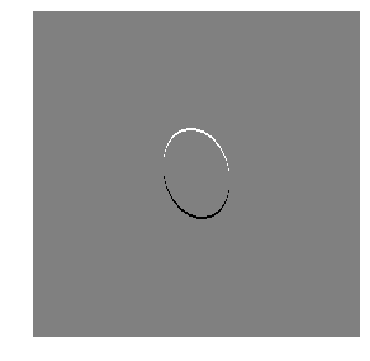

In [295]:
# D_y
plt.figure(figsize = (6,6))
plt.axis("off")
plt.imshow(f_12, cmap="gray")

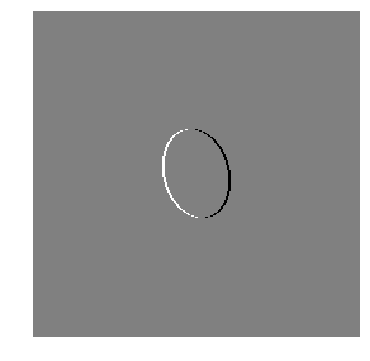

In [296]:
# D_x
plt.figure(figsize = (6,6))
plt.axis("off")
plt.imshow(f_21, cmap="gray")

In [297]:
WFimage = np.zeros(f.shape)
for i in range(f.shape[0]):
    for j in range(f.shape[1]):
        if fx[i,j] == 0:
            WFimage[i,j] = 0
        else:
            WFimage[i,j] = 180*np.arctan(f_21[i,j]/f_12[i,j])/(np.pi)

/homes/extern/andrade/store/miniconda3/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in double_scalars
  import sys
/homes/extern/andrade/store/miniconda3/envs/tf_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


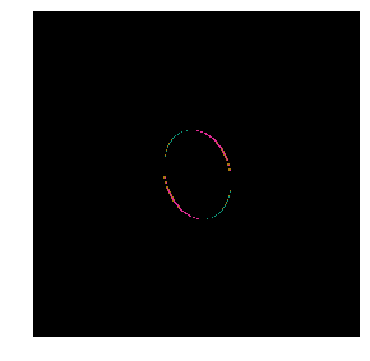

In [298]:
plt.figure(figsize = (6,6))
plt.axis("off")
plot_WF(WFimage)

## Second order matrices

### Second order derivatives with gradient function

In [283]:
def hessian(x):
    """
    Calculate the hessian matrix with finite differences
    Parameters:
       - x : ndarray
    Returns:
       an array of shape (x.dim, x.ndim) + x.shape
       where the array[i, j, ...] corresponds to the second derivative x_ij
    """
    x_grad = np.gradient(x) 
    hessian = np.empty((x.ndim, x.ndim) + x.shape, dtype=x.dtype) 
    for k, grad_k in enumerate(x_grad):
        # iterate over dimensions
        # apply gradient again to every component of the first derivative.
        tmp_grad = np.gradient(grad_k) 
        for l, grad_kl in enumerate(tmp_grad):
            hessian[k, l, :, :] = grad_kl
    return hessian

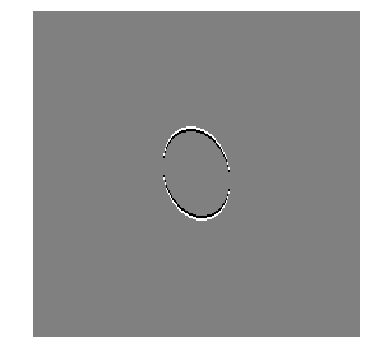

In [299]:
## D_y^2
plt.figure(figsize = (6,6))
plt.axis("off")
plt.imshow(hessian(f)[0,0,:,:], cmap="gray")

### Second order derivative with finite differences matrices

The second order derivation is done by using the convolutional kernels 

$$
\Delta_{22} = \begin{bmatrix} 1 & 0 & -1 \\ 0 & 0 & 0 \\ -1 & 0 & 1 \end{bmatrix} \quad \text{,} \quad
\Delta_{13}= \begin{bmatrix} 0 & -1 & 0 \\ 0 & 2 & 0 \\ 0 & -1 & 0 \end{bmatrix}  \quad \text{,} \quad
\Delta_{31}= \begin{bmatrix} 0 & 0 & 0 \\ 1 & -2 & 1 \\ 0 & 0 & 0 \end{bmatrix}  
$$

where the finite difference gradient of the function f will be given by the convolution with those kernels:

$$ 
\partial_x\partial_y f = \Delta_{22}\ast f \quad \text{,} \quad \partial_x^2 f = \Delta_{31} \ast f \quad \text{,} \quad \partial_y^2 f = \Delta_{13} \ast f
$$

In [348]:
D_22 = np.array([[1,0,-1],[0, 0, 0], [-1 , 0 , +1]])
D_13 = np.array([[0,-1,0],[0, 2, 0], [0 , -1 , 0]])
D_31 = np.array([[0,0,0],[1, -2, 1], [0 , 0 , 0]])

In [349]:
f_22 = convolve2d(f, D_22)
f_13 = convolve2d(f, D_13)
f_31 = convolve2d(f, D_31)

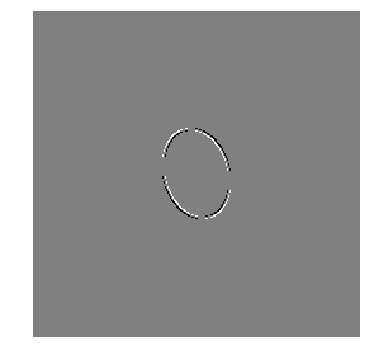

In [351]:
## D_xD_y
plt.figure(figsize = (6,6))
plt.axis("off")
plt.imshow(f_22, cmap="gray")

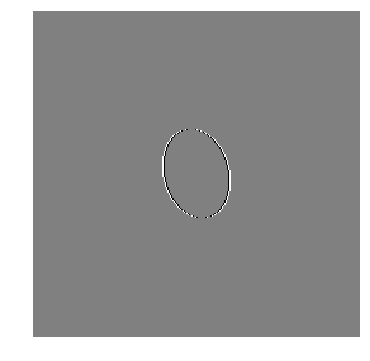

In [353]:
## D_x^2
plt.figure(figsize = (6,6))
plt.axis("off")
plt.imshow(f_31, cmap="gray")

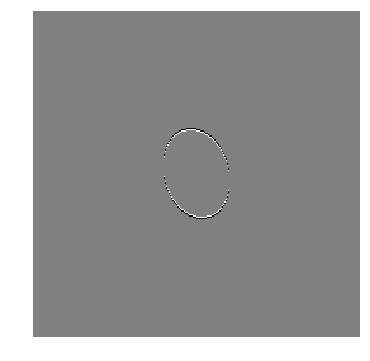

In [354]:
## D_y^2
plt.figure(figsize = (6,6))
plt.axis("off")
plt.imshow(f_13, cmap="gray")

## Third order matrices

### Approximation with finite differences

The third order derivation is done by using the convolutional kernels 

$$
\Delta_{23} = \begin{bmatrix} 1 & -2 & 1 \\ 0 & 0 & 0 \\ -1 & 2 & -1 \end{bmatrix} \quad \text{,} \quad
\Delta_{32}= \begin{bmatrix} 1 & 0 & -1 \\ -2 & 0 & 2 \\ 1 & 0 & -1 \end{bmatrix} 
$$

where the finite difference gradient of the function f will be given by the convolution with those kernels:

$$ 
\partial_x\partial_y^2 f = \Delta_{23}\ast f \quad \text{,} \quad \partial_x^2\partial_y f = \Delta_{32} \ast f 
$$

In [405]:
D_23 = np.array([[1,-2,1],[0, 0, 0], [-1 , 2 , -1]])
D_32 = np.array([[1,0,-1],[-2, 0, 2], [1 , 0 , -1]])

In [406]:
f_23 = convolve2d(f, D_23)
f_32 = convolve2d(f, D_32)

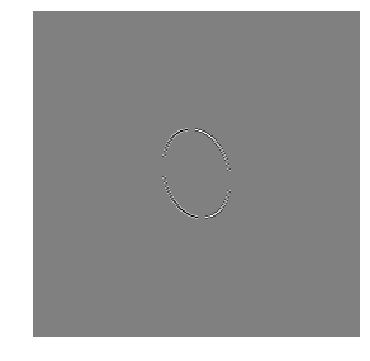

In [407]:
## D_x^2D_y
plt.figure(figsize = (6,6))
plt.axis("off")
plt.imshow(f_32, cmap="gray")

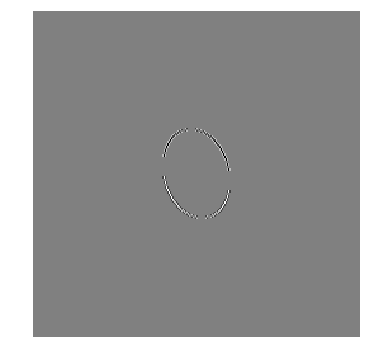

In [408]:
## D_xD_y^2
plt.figure(figsize = (6,6))
plt.axis("off")
plt.imshow(f_23, cmap="gray")

## Fourth order matrix

### Approximation with finite differences

The fourth order derivation is done by using the convolutional kernels 

$$
\Delta_{33} = \begin{bmatrix} -1 & 2 & -1 \\ 2 & -4 & 2 \\ -1 & 2 & -1 \end{bmatrix}
$$

where the finite difference gradient of the function f will be given by the convolution with those kernels:

$$ 
\partial_x^2\partial_y^2 f = \Delta_{33}\ast f
$$

In [429]:
D_33 = np.array([[-1,2,-1],[2, -4, 2], [-1 , 2 , -1]])

In [430]:
f_33 = convolve2d(f, D_33)

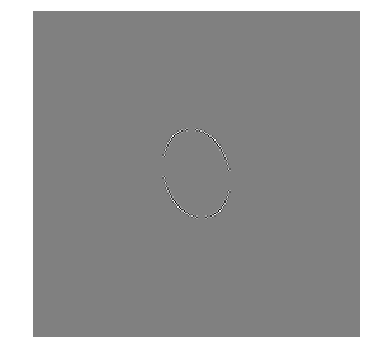

In [431]:
## D_x^2D_y^2
plt.figure(figsize = (6,6))
plt.axis("off")
plt.imshow(f_33, cmap="gray")

The linear combination of the above matrices of the form: 

$$\begin{split}
\theta = \theta(\beta)
  &= \beta_{11}\Delta_{11}
  +\frac{\beta_{12}}{2h}\Delta_{12}
  +\frac{\beta_{21}}{2h}\Delta_{21}
  +\frac{\beta_{22}}{4h^2}\Delta_{22}
  +\frac{\beta_{13}}{h^2}\Delta_{13}
  \\ & \phantom{=}
  +\frac{\beta_{31}}{h^2}\Delta_{31}
  +\frac{\beta_{32}}{2h^3}\Delta_{32}
  +\frac{\beta_{23}}{2h^3}\Delta_{23}
  +\frac{\beta_{33}}{h^4}\Delta_{33}
\end{split}
$$

are the discretization of the partial differential operator: 

$$
\begin{multline}
\mathcal{K}_{\theta}(f) = \theta\ast f = 
\beta_{11} f 
+\beta_{12}\partial_{2}f
+\beta_{21}\partial_{1}f
+\beta_{22}\partial_{1}\partial_{2}f
+\beta_{13}\partial_{2}^2f
+\beta_{31}\partial_{1}^2f
+\beta_{23}\partial_{2}^2\partial_{1} f
+\beta_{32}\partial_{1}^2\partial_{2}f
+\beta_{33}\partial_{1}^2\partial_{2}^2f. 
\end{multline}
$$